In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

In [4]:
df=pd.read_csv('CSVs/Games_df')
df.head()

,#,Avg. viewers,Max. viewers,User,Game,new_date,new_time,Airtime1,Followers per hour,Airtime %
0,#1,4917,22052,LatinUp,Music,2021-06-04,01:30:00,1726,58.4,100.0
1,#1,19338,80266,Reborn_Live,Grand Theft Auto V,2020-10-30,00:20:00,32940,747.5,33.0
2,#2,12478,113707,Reborn_Live,Just Chatting,2021-06-06,23:40:00,21780,469.7,21.8
3,#3,13741,58945,Reborn_Live,Among Us,2021-01-27,20:20:00,8465,1288.7,8.5
4,#4,16088,77378,Reborn_Live,Rust,2021-05-25,23:40:00,7811,1221.3,7.8


In [3]:
df[df['User'] == 'LatinUp']

,#,Avg. viewers,Max. viewers,User,Game,new_date,new_time,Airtime1,Followers per hour,Airtime %
0,#1,4917,22052,LatinUp,Music,2021-06-04,01:30:00,1726,58.4,100.0


In [4]:
games = df.groupby(['Game']).sum()

In [5]:
games

,Avg. viewers,Max. viewers,Airtime1,Followers per hour,Airtime %
Game,,,,,
*N Sync: Get to the Show,1664,1714,70,8.6,0.0
007: The World is Not Enough,5212,5406,30,4.0,0.0
10 Amazingly Awful Games,2980,3847,204,22.9,0.1
100 Classic Books,1864,1944,80,9.8,0.0
100% Orange Juice,1738,2580,343,0.7,0.1
...,...,...,...,...,...
osu!,2949,10966,13879,234.1,5.4
skribbl.io,42472,58103,1804,2146.4,0.8
theHunter: Call of the Wild,3021,3216,187,23.0,0.0


In [6]:
music = df[df['Game']=='Music']

In [7]:
music

,#,Avg. viewers,Max. viewers,User,Game,new_date,new_time,Airtime1,Followers per hour,Airtime %
0,#1,4917,22052,LatinUp,Music,2021-06-04,01:30:00,1726,58.4,100.0
395,#237,543,1112,GiantBomb,Music,2020-06-01,21:20:00,35,1.7,0.0
1360,#5,6412,9144,xth0rek,Music,2021-05-06,16:00:00,2102,138.4,2.3
2558,#14,5289,7042,ProtonJon,Music,2021-05-10,02:10:00,1640,47.7,0.8
4650,#109,1717,3806,WELOVEGAMES,Music,2021-05-31,22:40:00,1600,12.7,0.2
5845,#398,1632,1982,Vargskelethor,Music,2019-12-31,01:50:00,99,21.2,0.0


In [8]:
chatting=df[df['Game']=='Just Chatting']

In [9]:
chatting

,#,Avg. viewers,Max. viewers,User,Game,new_date,new_time,Airtime1,Followers per hour,Airtime %
2,#2,12478,113707,Reborn_Live,Just Chatting,2021-06-06,23:40:00,21780,469.7,21.8
98,#5,5513,8749,playhearthstonekr,Just Chatting,2020-12-06,11:50:00,133,193.5,0.1
128,#30,1824,5918,Ray__C,Just Chatting,2021-02-13,22:20:00,137,12.7,0.0
152,#13,3074,5232,tarik,Just Chatting,2021-06-06,08:20:00,152,76.2,0.1
197,#39,1977,3581,GiantBomb,Just Chatting,2020-07-15,21:15:00,452,18.2,0.5
481,#40,1312,7128,Timmac,Just Chatting,2021-01-29,02:00:00,1254,-0.7,0.1
559,#1,2806,51954,JustaMinx,Just Chatting,2021-06-05,22:50:00,108207,392.2,53.6
709,#3,4935,132402,LeBouseuh,Just Chatting,2021-06-03,15:40:00,19736,356.5,8.0
792,#15,2219,4690,VooDooSh,Just Chatting,2021-06-05,16:30:00,2675,16.0,0.6
863,#1,3702,20682,CodeMiko,Just Chatting,2021-06-07,00:50:00,64429,345.3,90.8


In [10]:
variety = df[df['Game']=='Variety']

In [11]:
variety

,#,Avg. viewers,Max. viewers,User,Game,new_date,new_time,Airtime1,Followers per hour,Airtime %
23,#23,5310,14732,Reborn_Live,Variety,2021-03-24,22:50:00,407,143.0,0.4
158,#19,1171,1171,tarik,Variety,2018-01-06,07:10:00,20,45.0,0.0
172,#14,1366,4748,GiantBomb,Variety,2020-11-05,17:40:00,1321,12.9,1.3
550,#109,235,297,Timmac,Variety,2021-02-04,21:20:00,73,-0.8,0.0
563,#5,3077,11166,JustaMinx,Variety,2021-05-18,00:20:00,6276,246.2,3.1
706,#2,192,1103,HLTVorg,Variety,2017-12-10,23:30:00,178,36.7,0.9
732,#26,3150,7566,LeBouseuh,Variety,2021-01-09,12:10:00,812,166.0,0.3
830,#53,1468,4949,VooDooSh,Variety,2021-02-08,01:00:00,453,4.8,0.1
877,#15,398,430,CodeMiko,Variety,2020-09-19,22:20:00,75,4.8,0.1
912,#33,3129,11704,Mithrain,Variety,2020-11-09,23:30:00,1343,87.9,0.3


In [12]:
music_idx = music.index

In [13]:
music_idx

Int64Index([0, 395, 1360, 2558, 4650, 5845], dtype='int64')

In [14]:
variety_idx = variety.index

In [15]:
chatting_idx = chatting.index

In [16]:
g1 = df.drop(music_idx)

In [17]:
g2= g1.drop(variety_idx)

In [18]:
games = g2.drop(chatting_idx)

In [19]:
games

,#,Avg. viewers,Max. viewers,User,Game,new_date,new_time,Airtime1,Followers per hour,Airtime %
1,#1,19338,80266,Reborn_Live,Grand Theft Auto V,2020-10-30,00:20:00,32940,747.5,33.0
3,#3,13741,58945,Reborn_Live,Among Us,2021-01-27,20:20:00,8465,1288.7,8.5
4,#4,16088,77378,Reborn_Live,Rust,2021-05-25,23:40:00,7811,1221.3,7.8
5,#5,10736,41085,Reborn_Live,Minecraft,2021-06-02,23:00:00,3383,493.3,3.4
6,#6,15770,25833,Reborn_Live,Fall Guys: Ultimate Knockout,2021-06-03,23:00:00,2059,457.3,2.1
...,...,...,...,...,...,...,...,...,...,...
6061,#12,801,931,OgamingLoL,Super Smash Bros. for Wii U,2017-12-16,17:10:00,50,3.6,0.0
6062,#13,692,697,OgamingLoL,Team Fortress 2,2017-12-16,14:30:00,20,0.0,0.0
6064,#2,2813,5581,Taylor_Jevaux,"Pools, Hot Tubs, and Beaches",2021-06-07,00:40:00,2357,562.9,5.3
6065,#3,2083,2943,Taylor_Jevaux,Poker,2021-02-25,23:00:00,360,320.7,0.8


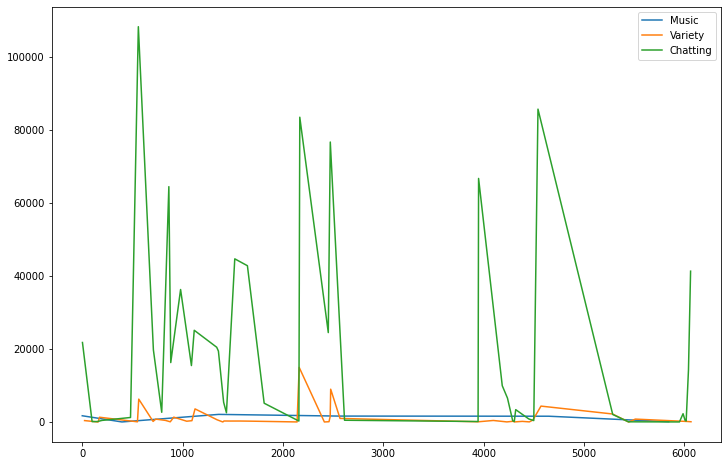

In [20]:
fig = plt.figure(figsize=(12,8))
#plt.plot(games['Airtime1'],label='Games')
plt.plot(music['Airtime1'],label='Music')
plt.plot(variety['Airtime1'], label='Variety')
plt.plot(chatting['Airtime1'], label='Chatting')
plt.legend()

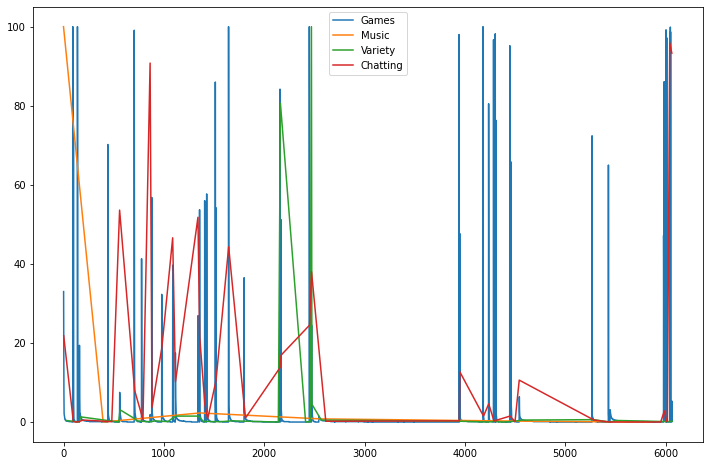

In [21]:
fig = plt.figure(figsize=(12,8))
plt.plot(games['Airtime %'],label='Games')
plt.plot(music['Airtime %'],label='Music')
plt.plot(variety['Airtime %'], label='Variety')
plt.plot(chatting['Airtime %'], label='Chatting')
plt.legend()


In [22]:
#barplot 3 categories

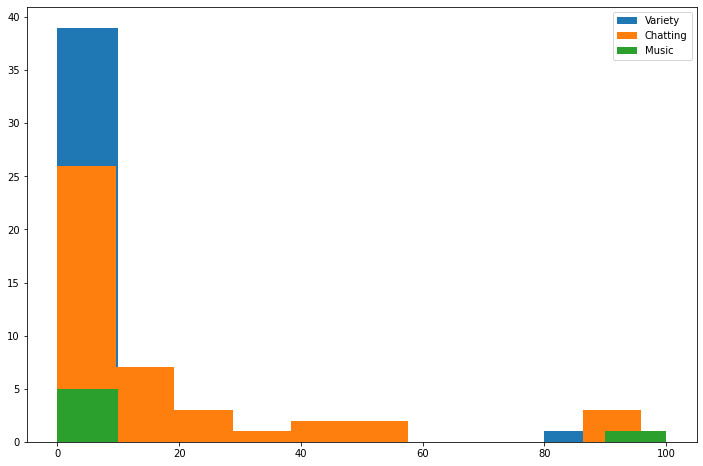

In [23]:

fig = plt.figure(figsize=(12,8))
#plt.hist(games['Airtime %'],label='Games')

plt.hist(variety['Airtime %'], label='Variety')
plt.hist(chatting['Airtime %'], label='Chatting')
plt.hist(music['Airtime %'],label='Music')
plt.legend()

<AxesSubplot:xlabel='Airtime %', ylabel='Count'>

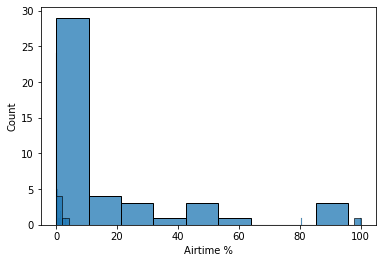

In [24]:
sns.histplot(variety['Airtime %'], label='Variety')
sns.histplot(chatting['Airtime %'], label='Chatting')
sns.histplot(music['Airtime %'],label='Music')

In [25]:
#sns.barplot(variety['Airtime %'], label='Variety')
#sns.barplot(chatting['Airtime %'], label='Chatting')
#sns.barplot(music['Airtime %'],label='Music')

In [26]:
frames=[music,chatting,variety]
merged_df=pd.concat(frames)

In [27]:
merged_df

,#,Avg. viewers,Max. viewers,User,Game,new_date,new_time,Airtime1,Followers per hour,Airtime %
0,#1,4917,22052,LatinUp,Music,2021-06-04,01:30:00,1726,58.4,100.0
395,#237,543,1112,GiantBomb,Music,2020-06-01,21:20:00,35,1.7,0.0
1360,#5,6412,9144,xth0rek,Music,2021-05-06,16:00:00,2102,138.4,2.3
2558,#14,5289,7042,ProtonJon,Music,2021-05-10,02:10:00,1640,47.7,0.8
4650,#109,1717,3806,WELOVEGAMES,Music,2021-05-31,22:40:00,1600,12.7,0.2
...,...,...,...,...,...,...,...,...,...,...
5285,#18,3956,9228,FENGRUSH,Variety,2021-05-27,20:10:00,2215,1.9,0.6
5446,#16,7,7,JoeWo,Variety,2019-08-08,04:40:00,10,0.0,0.0
5512,#65,2136,3682,Vargskelethor,Variety,2021-01-08,09:20:00,813,21.0,0.4
6028,#17,1012,2155,tarzaned,Variety,2019-06-14,23:30:00,165,22.9,0.1


<AxesSubplot:xlabel='Game', ylabel='Count'>

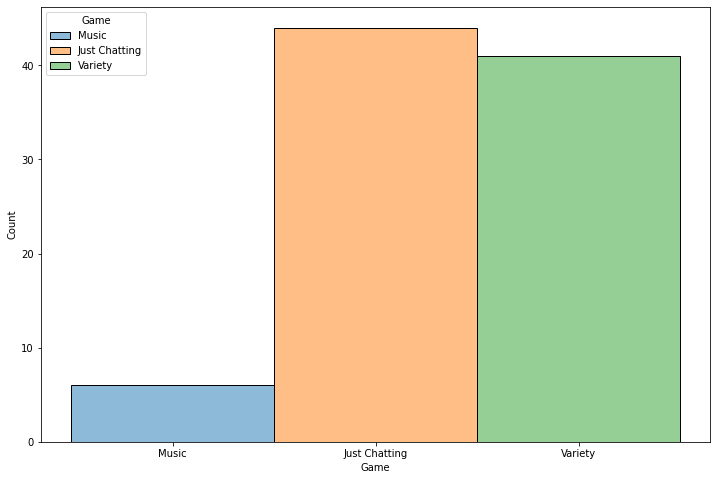

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(merged_df, x='Game', hue='Game')

In [31]:
#each observetion devided by 200

In [34]:
merged_df_with_games.Game.value_counts('Music')

Just Chatting                           0.007251
Variety                                 0.006757
Fall Guys: Ultimate Knockout            0.005933
Among Us                                0.005274
Fortnite                                0.005274
                                          ...   
Knight Squad                            0.000165
Jak and Daxter: The Precursor Legacy    0.000165
Virtual Rides 3                         0.000165
Hard Core                               0.000165
Super Ghouls 'n Ghosts                  0.000165
Name: Game, Length: 3346, dtype: float64

In [50]:
values_c =df.Game.value_counts()

In [52]:
music_c = values_c['Music']

In [55]:
chat_c= values_c['Just Chatting']

In [53]:
music_c/200

0.03

In [56]:
chat_c/200

0.22

In [58]:
var_c =values_c['Variety']

In [41]:
#time on air for music

In [59]:
var_c/200

0.205

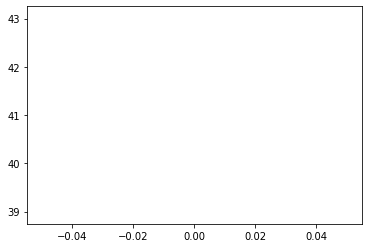

In [44]:
music_rows = df[df['Game'] == 'Music']


In [45]:
music_rows

,#,Avg. viewers,Max. viewers,User,Game,new_date,new_time,Airtime1,Followers per hour,Airtime %
0,#1,4917,22052,LatinUp,Music,2021-06-04,01:30:00,1726,58.4,100.0
395,#237,543,1112,GiantBomb,Music,2020-06-01,21:20:00,35,1.7,0.0
1360,#5,6412,9144,xth0rek,Music,2021-05-06,16:00:00,2102,138.4,2.3
2558,#14,5289,7042,ProtonJon,Music,2021-05-10,02:10:00,1640,47.7,0.8
4650,#109,1717,3806,WELOVEGAMES,Music,2021-05-31,22:40:00,1600,12.7,0.2
5845,#398,1632,1982,Vargskelethor,Music,2019-12-31,01:50:00,99,21.2,0.0
